In [1]:
import pandas as pd
from pathlib import Path

df_images = {"image_path": [], "label": []}

for dir in Path("./cats_vs_dogs").iterdir():
    for path in dir.glob("*"):
        df_images["image_path"].append(path)
        df_images["label"].append(dir.name)
        
df_images = pd.DataFrame.from_dict(df_images)
df_images

,image_path,label
0,cats_vs_dogs\cat\0.jpg,cat
1,cats_vs_dogs\cat\1.jpg,cat
2,cats_vs_dogs\cat\10.jpg,cat
3,cats_vs_dogs\cat\100.jpg,cat
4,cats_vs_dogs\cat\101.jpg,cat
...,...,...
1872,cats_vs_dogs\dog\995.jpg,dog
1873,cats_vs_dogs\dog\996.jpg,dog
1874,cats_vs_dogs\dog\997.jpg,dog
1875,cats_vs_dogs\dog\998.jpg,dog


In [2]:
df_images_random = df_images.sample(10, random_state=123)
df_images_random

,image_path,label
1744,cats_vs_dogs\dog\873.jpg,dog
182,cats_vs_dogs\cat\270.jpg,cat
1653,cats_vs_dogs\dog\786.jpg,dog
1574,cats_vs_dogs\dog\708.jpg,dog
1860,cats_vs_dogs\dog\984.jpg,dog
1416,cats_vs_dogs\dog\559.jpg,dog
1471,cats_vs_dogs\dog\612.jpg,dog
1636,cats_vs_dogs\dog\77.jpg,dog
1807,cats_vs_dogs\dog\932.jpg,dog
615,cats_vs_dogs\cat\687.jpg,cat


In [3]:
# %pip install -q torch transformers

from transformers import pipeline

image_feature_extractor = pipeline(task="image-feature-extraction", model="facebook/dinov2-small", framwork="pt", pool=True, )

from PIL import Image

df_images_random["features"] = df_images_random["image_path"].apply(lambda p: image_feature_extractor(Image.open(p).convert("RGB"))[0])

df_images_random

C:\Users\khaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


,image_path,label,features
1744,cats_vs_dogs\dog\873.jpg,dog,"[-2.8113183975219727, -0.9009686708450317, -2...."
182,cats_vs_dogs\cat\270.jpg,cat,"[-2.721294403076172, -5.086968898773193, -2.47..."
1653,cats_vs_dogs\dog\786.jpg,dog,"[1.4318478107452393, -0.8872222304344177, -2.4..."
1574,cats_vs_dogs\dog\708.jpg,dog,"[-1.927943468093872, -1.9858896732330322, 1.34..."
1860,cats_vs_dogs\dog\984.jpg,dog,"[-2.10009503364563, -3.3293662071228027, -0.21..."
1416,cats_vs_dogs\dog\559.jpg,dog,"[-0.599040150642395, -0.8483070135116577, -0.3..."
1471,cats_vs_dogs\dog\612.jpg,dog,"[0.9379027485847473, -2.3461973667144775, -0.8..."
1636,cats_vs_dogs\dog\77.jpg,dog,"[0.21226035058498383, -0.8780134916305542, -2...."
1807,cats_vs_dogs\dog\932.jpg,dog,"[0.23748520016670227, 0.25207215547561646, -0...."
615,cats_vs_dogs\cat\687.jpg,cat,"[-0.557390034198761, -1.9384899139404297, -1.8..."


In [4]:
df_house = pd.read_csv("1_house_prices.csv")

In [5]:
df_house_random = df_house.sample(10, random_state=123)
df_house_random

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
91437,Lower Portion,26000.0,G-13,Islamabad,2.0,For Rent,1.0,4.4
34615,Flat,6700000.0,Gulshan-e-Iqbal Town,Karachi,2.0,For Sale,2.0,4.7
8493,House,6800000.0,Korangi,Karachi,4.0,For Sale,6.0,4.0
32002,Upper Portion,75000.0,F-11,Islamabad,3.0,For Rent,3.0,20.0
87469,House,95000.0,F-11,Islamabad,4.0,For Rent,4.0,20.0
40213,Flat,65000.0,Gulshan-e-Iqbal Town,Karachi,3.0,For Rent,3.0,6.7
36502,Flat,14200000.0,Scheme 33,Karachi,4.0,For Sale,3.0,11.6
87480,House,190000.0,F-8,Islamabad,5.0,For Rent,5.0,20.0
68835,House,6000000.0,Al Rehman Garden,Lahore,3.0,For Sale,3.0,3.0
29620,Flat,8500000.0,F-11,Islamabad,1.0,For Sale,1.0,5.6


In [6]:
text_feature_extractor = pipeline(
    task="feature-extraction",
    model="intfloat/multilingual-e5-small",
    framwork="pt",
)

df_house_random["location_features"] = df_house_random["location"].apply(
    lambda t: text_feature_extractor(t)[0][0]
)

df_house_random[["location", "location_features"]]

Device set to use cpu


,location,location_features
91437,G-13,"[0.2235167920589447, 0.04409223049879074, -0.2..."
34615,Gulshan-e-Iqbal Town,"[0.2104579508304596, 0.03157217055559158, -0.1..."
8493,Korangi,"[0.2911369800567627, -0.08894369006156921, -0...."
32002,F-11,"[0.23713189363479614, -0.00941164419054985, -0..."
87469,F-11,"[0.23713189363479614, -0.00941164419054985, -0..."
40213,Gulshan-e-Iqbal Town,"[0.2104579508304596, 0.03157217055559158, -0.1..."
36502,Scheme 33,"[0.20517100393772125, -0.06785479933023453, -0..."
87480,F-8,"[0.2499699592590332, -0.040180448442697525, -0..."
68835,Al Rehman Garden,"[0.21919703483581543, 0.06038270145654678, -0...."
29620,F-11,"[0.23713189363479614, -0.00941164419054985, -0..."


In [7]:
df_house = pd.read_csv("1_house_prices.csv")
df_house

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000.0,G-10,Islamabad,2.0,For Sale,2.0,4.0
1,Flat,6900000.0,E-11,Islamabad,3.0,For Sale,3.0,5.6
2,House,16500000.0,G-15,Islamabad,6.0,For Sale,5.0,8.0
3,House,43500000.0,Bani Gala,Islamabad,4.0,For Sale,4.0,40.0
4,House,7000000.0,DHA Defence,Islamabad,3.0,For Sale,3.0,8.0
...,...,...,...,...,...,...,...,...
99494,Flat,7500000.0,Bahria Town Karachi,Karachi,3.0,For Sale,3.0,8.0
99495,House,8800000.0,Bahria Town Karachi,Karachi,4.0,For Sale,3.0,8.0
99496,House,14000000.0,Bahria Town Karachi,Karachi,3.0,For Sale,3.0,8.0
99497,House,14000000.0,Bahria Town Karachi,Karachi,4.0,For Sale,4.0,14.0


## Data Leaked

##### Train-test-split

In [8]:
from sklearn.model_selection import train_test_split

df_house_train, df_house_test = train_test_split(df_house, test_size=0.3, random_state=123)
len(df_house_train), len(df_house_test)

(69649, 29850)

In [9]:
df_house_train.isnull().sum()

property_type     70
price             93
location          59
city              79
baths            102
purpose           68
bedrooms          81
Area_in_Marla     86
dtype: int64

##### N-gram Vectorization

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

df_house_train["location"] = df_house_train["location"].fillna("Unknow")

location_vectorizer = CountVectorizer()
location_vectorizer.fit(df_house_train["location"])

location_vectors = location_vectorizer.transform(df_house_train["location"])
location_vectors

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 141378 stored elements and shape (69649, 1109)>

In [11]:
location_vectorizer_df = pd.DataFrame(location_vectors.toarray(), 
                                      index=df_house_train.index, 
                                      columns=location_vectorizer.get_feature_names_out())
location_vectorizer_df.columns[100:200]

Index(['asif', 'asim', 'askari', 'aslam', 'atari', 'ataturk', 'athal', 'audit',
       'avenue', 'avenues', 'awami', 'awan', 'awt', 'ayub', 'azam', 'azeem',
       'aziz', 'azizabad', 'azmat', 'baba', 'babar', 'babu', 'babuwala',
       'badami', 'badar', 'baga', 'bagarian', 'bagh', 'baghbanpura',
       'bahadurabad', 'bahar', 'bahria', 'baig', 'bait', 'bakar', 'bakhsh',
       'bakhtawar', 'bakra', 'baksh', 'baldia', 'baloch', 'banaras', 'band',
       'bani', 'bank', 'bankers', 'banni', 'bara', 'barkat', 'basti',
       'batapur', 'bath', 'bawa', 'bay', 'bazar', 'beacon', 'beaumont',
       'bedian', 'begampura', 'begum', 'berg', 'bethsaida', 'bhagatpura',
       'bhaini', 'bhara', 'bhata', 'bhatta', 'bhatti', 'bhogiwal', 'bilal',
       'bin', 'bismillah', 'blue', 'bmchs', 'board', 'bokra', 'booti', 'bor',
       'bostan', 'boulevard', 'breeze', 'britto', 'bund', 'burg', 'burj',
       'burma', 'bypass', 'caltex', 'canal', 'canalberg', 'cantt', 'canyon',
       'cap', 'capital', 'c

## Missing Values

In [12]:
df_house_train.isnull().sum()

property_type     70
price             93
location           0
city              79
baths            102
purpose           68
bedrooms          81
Area_in_Marla     86
dtype: int64

In [13]:
df_house_train = df_house_train.dropna(subset=["price"])
df_house_train

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
74479,House,60000.0,DHA Defence,Islamabad,4.0,For Rent,3.0,11.0
29448,House,37500000.0,Sui Gas Housing Society,Lahore,7.0,For Sale,6.0,20.0
12583,House,16000000.0,Gulistan-e-Jauhar,Karachi,3.0,For Sale,3.0,6.0
37629,Flat,4300000.0,Bahria Orchard,Lahore,1.0,For Sale,2.0,5.0
32383,Lower Portion,55000.0,Federal B Area,Karachi,3.0,For Rent,3.0,16.0
...,...,...,...,...,...,...,...,...
63206,Upper Portion,45000.0,North Nazimabad,Karachi,3.0,For Rent,3.0,8.0
61404,Lower Portion,70000.0,Cantt,Karachi,3.0,For Rent,3.0,22.0
17730,House,11500000.0,Rehman Villas,Lahore,4.0,For Sale,3.0,5.5
28030,Flat,7000000.0,Gulistan-e-Jauhar,Karachi,3.0,For Sale,3.0,6.2


In [14]:
import warnings
warnings.filterwarnings("ignore")
# if you don't want to see warning text you can also use this library to ignore it.

df_house_train["property_type"].fillna("Unknown", inplace=True)
df_house_train["city"].fillna("Unknown", inplace=True)
df_house_train["purpose"].fillna("Unknown", inplace=True)

df_house_train.isnull().sum()

property_type      0
price              0
location           0
city               0
baths            102
purpose            0
bedrooms          81
Area_in_Marla     86
dtype: int64

In [15]:
bath_mean = pd.to_numeric(df_house_train["baths"], errors="coerce").dropna().mean()
df_house_train["baths"].fillna(bath_mean, inplace=True)

bedroom_mean = pd.to_numeric(df_house_train["bedrooms"], errors="coerce").dropna().mean()
df_house_train["bedrooms"].fillna(bedroom_mean, inplace=True)

area_mean = pd.to_numeric(df_house_train["Area_in_Marla"], errors="coerce").dropna().mean()
df_house_train["Area_in_Marla"].fillna(bedroom_mean, inplace=True)

df_house_train.isnull().sum()

property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

## Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

df_house_train["Area_in_Marla"] = pd.to_numeric(df_house_train["Area_in_Marla"], errors="coerce")

scaler_01 = MinMaxScaler()
scaler_01.fit(df_house_train[["Area_in_Marla"]])

df_house_train["Area_in_Marla"] = scaler_01.transform(df_house_train[["Area_in_Marla"]])
df_house_train["Area_in_Marla"].describe()

# when error Expected a 2-dimensional container we can only use [] in data fram that we use.

count    69510.000000
mean         0.048677
std          0.041237
min          0.000000
25%          0.026667
50%          0.037222
75%          0.055556
max          1.000000
Name: Area_in_Marla, dtype: float64

## Encoding Categorical Data

In [17]:
from sklearn.preprocessing import OneHotEncoder

city_encoder = OneHotEncoder(sparse_output=False)
city_encoder.fit(df_house_train[["city"]])

city_vectors = city_encoder.transform(df_house_train[["city"]])

city_vectors = pd.DataFrame(
    city_vectors,
    columns=city_encoder.get_feature_names_out(),
    index=df_house_train.index
)

city_vectors

,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,city_Unknown
74479,0.0,1.0,0.0,0.0,0.0,0.0
29448,0.0,0.0,0.0,1.0,0.0,0.0
12583,0.0,0.0,1.0,0.0,0.0,0.0
37629,0.0,0.0,0.0,1.0,0.0,0.0
32383,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
63206,0.0,0.0,1.0,0.0,0.0,0.0
61404,0.0,0.0,1.0,0.0,0.0,0.0
17730,0.0,0.0,0.0,1.0,0.0,0.0
28030,0.0,0.0,1.0,0.0,0.0,0.0


## Feature Importance

In [18]:
import numpy as np

df_house_train["Area_in_Marla"] = pd.to_numeric(
    df_house_train["Area_in_Marla"], errors="coerce")

df_house_train["Area_in_Marla"].fillna(
    df_house_train["Area_in_Marla"].mean())

df_house_train["bedrooms"] = pd.to_numeric(
    df_house_train["bedrooms"], errors="coerce")

df_house_train["bedrooms"].fillna(
    df_house_train["bedrooms"].mean())

df_house_train["baths"] = pd.to_numeric(
    df_house_train["baths"], errors="coerce")

df_house_train["baths"].fillna(
    df_house_train["baths"].mean())

df_house_train["price"] = pd.to_numeric(
    df_house_train["price"], errors="coerce")

df_house_train["price"].fillna(
    df_house_train["price"].mean())

df_house_train["random"] = np.random.rand(len(df_house_train))

df_house_train_features = df_house_train.select_dtypes(
    include=np.number).copy()

df_house_train_features

,price,baths,bedrooms,Area_in_Marla,random
74479,60000.0,4.0,3.0,0.061111,0.031970
29448,37500000.0,7.0,6.0,0.111111,0.321988
12583,16000000.0,3.0,3.0,0.033333,0.464437
37629,4300000.0,1.0,2.0,0.027778,0.691727
32383,55000.0,3.0,3.0,0.088889,0.314128
...,...,...,...,...,...
63206,45000.0,3.0,3.0,0.044444,0.233584
61404,70000.0,3.0,3.0,0.122222,0.045332
17730,11500000.0,4.0,3.0,0.030556,0.577029
28030,7000000.0,3.0,3.0,0.034444,0.053751


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

df_house_train_features = df_house_train_features.dropna()

features = df_house_train_features.drop("price", axis=1)
label = df_house_train_features["price"]

model = LinearRegression()
model.fit(features, label)

result = permutation_importance(
    model, features, label, n_repeats=10)
result

{'importances_mean': array([3.04220118e-01, 4.41701836e-02, 5.86312653e-03, 9.17816347e-07]),
 'importances_std': array([3.04791419e-03, 1.07586374e-03, 3.14354121e-04, 3.27398226e-06]),
 'importances': array([[ 3.01964916e-01,  3.02876125e-01,  3.06908285e-01,
          3.07896789e-01,  3.05667646e-01,  3.06768923e-01,
          3.04710382e-01,  2.96710489e-01,  3.04377548e-01,
          3.04320075e-01],
        [ 4.26592505e-02,  4.36185428e-02,  4.45946221e-02,
          4.59923611e-02,  4.48603596e-02,  4.44575949e-02,
          4.46275082e-02,  4.21517645e-02,  4.38383017e-02,
          4.49015301e-02],
        [ 5.71278266e-03,  5.58350084e-03,  5.94104725e-03,
          5.83595311e-03,  5.56141450e-03,  6.05830296e-03,
          5.90063543e-03,  6.61389697e-03,  5.97703982e-03,
          5.44669179e-03],
        [ 2.26087324e-06, -1.20240297e-06,  4.82976413e-06,
         -1.10734319e-06,  4.69512622e-06, -7.23113424e-07,
         -2.26560857e-06, -5.04625556e-06,  4.70730923e-0

In [20]:
result_df = pd.DataFrame(
    {"feature": features.columns, "score": result.importances_mean})
result_df

,feature,score
0,baths,3.042201e-01
1,bedrooms,4.417018e-02
2,Area_in_Marla,5.863127e-03
3,random,9.178163e-07


<Axes: ylabel='feature'>

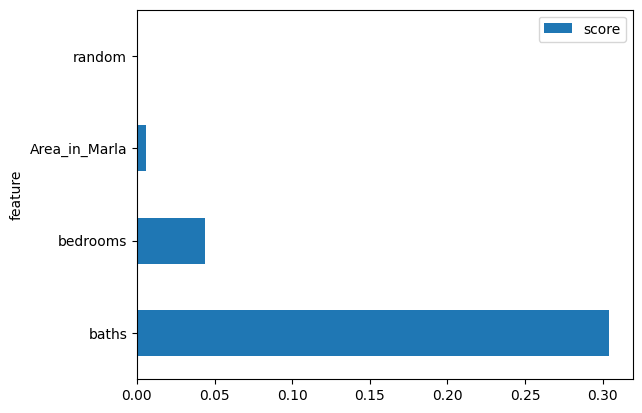

In [21]:
result_df.plot(kind="barh", x="feature", y="score")

In [22]:
features.columns

Index(['baths', 'bedrooms', 'Area_in_Marla', 'random'], dtype='object')